### 세팅하기

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
import matplotlib.pyplot as plt
plt.rc('font', family='NanumBarunGothic') # 한글 폰트 설정
plt.rcParams['axes.unicode_minus'] = False # 마이너스 부호 깨짐 방지

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following NEW packages will be installed:
  fonts-nanum
0 upgraded, 1 newly installed, 0 to remove and 29 not upgraded.
Need to get 10.3 MB of archives.
After this operation, 34.1 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy/universe amd64 fonts-nanum all 20200506-1 [10.3 MB]
Fetched 10.3 MB in 2s (5,915 kB/s)
Selecting previously unselected package fonts-nanum.
(Reading database ... 125044 files and directories currently installed.)
Preparing to unpack .../fonts-nanum_20200506-1_all.deb ...
Unpacking fonts-nanum (20200506-1) ...
Setting up fonts-nanum (20200506-1) ...
Processing triggers for fontconfig (2.13.1-4.2ubuntu5) ...
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr

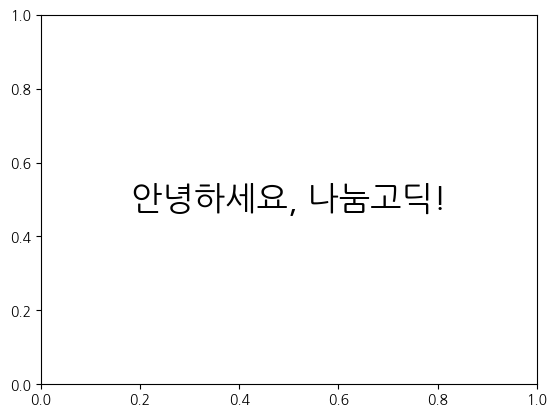

In [4]:
##########################################
### 한글이 깨지는 경우 아래 코드 실행하기 !!!###
##########################################
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm

# 나눔고딕 폰트를 설치합니다.
!apt-get install -y fonts-nanum
!fc-cache -fv

# 설치된 나눔고딕 폰트를 matplotlib에 등록합니다.
font_path = '/usr/share/fonts/truetype/nanum/NanumGothic.ttf'
fm.fontManager.addfont(font_path)
plt.rcParams['font.family'] = 'NanumGothic'

# 폰트가 잘 설정되었는지 테스트합니다.
plt.text(0.5, 0.5, '안녕하세요, 나눔고딕!', ha='center', va='center', size=24)
plt.show()

### 타 공공 이동수단 물가상승률 확인

In [5]:
df = pd.read_excel('/content/drive/MyDrive/코드잇부트캠프/프로젝트/초급 프로젝트/data/품목별_소비자물가지수_품목성질별_2020100__20250317104841.xlsx')


/usr/local/lib/python3.11/dist-packages/openpyxl/styles/stylesheet.py:237: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")


In [6]:
df.head(10)

,시도별,품목별,2015,2016,2017,2018,2019,2020,2021,2022,2023,2024
0,전국,총지수,94.861,95.783,97.645,99.086,99.466,100,102.50,107.72,111.59,114.18
1,전국,농축수산물,83.947,87.169,91.957,95.328,93.733,100,108.73,112.82,116.28,123.10
2,전국,(농산물)곡물,85.351,78.3,75.708,92.281,101.166,100,109.15,98.86,99.34,102.63
3,전국,쌀,84.913,76.155,72.025,91.531,99.209,100,109.40,97.08,98.71,100.33
4,전국,현미,86.384,82.929,77.622,89.188,103.994,100,107.66,103.11,97.55,103.87
5,전국,찹쌀,86.732,82.972,77.484,90.147,104.652,100,107.00,98.92,94.11,101.79
6,전국,보리쌀,104.507,105.427,107.395,111.139,109.306,100,99.76,106.03,115.09,132.27
7,전국,콩,76.602,70.25,90.166,104.443,114.33,100,116.67,104.30,99.29,104.53
8,전국,땅콩,88.8,89.31,88.016,87.997,94.228,100,105.15,106.21,109.63,117.41
9,전국,혼식곡,97.706,90.929,86.955,93.364,100.858,100,105.74,104.41,106.76,109.86


In [7]:
# 이상한 공백/문자 지우기

df['품목별'] = df['품목별'].str.replace(r'\s+', '', regex=True)

In [8]:
row_list = ['도시철도료', '시내버스료', '택시료']

tran_df = df[df['품목별'].isin(row_list)]
tran_df

,시도별,품목별,2015,2016,2017,2018,2019,2020,2021,2022,2023,2024
345,전국,도시철도료,92.653,98.156,99.67,100,100,100,100.00,100.00,102.26,111.78
346,전국,시내버스료,89.846,94.282,95.156,94.939,96.14,100,100.62,100.27,104.35,112.33
348,전국,택시료,85.499,85.499,85.867,86.624,97.396,100,100.05,100.93,114.04,121.89


In [9]:
tran_df = tran_df.drop('시도별', axis = 1)

In [10]:
new_df = tran_df.transpose()

In [11]:
new_df

,345,346,348
품목별,도시철도료,시내버스료,택시료
2015,92.653,89.846,85.499
2016,98.156,94.282,85.499
2017,99.67,95.156,85.867
2018,100,94.939,86.624
2019,100,96.14,97.396
2020,100,100,100
2021,100.0,100.62,100.05
2022,100.0,100.27,100.93
2023,102.26,104.35,114.04


In [12]:
new_df.columns = ['도시철도료', '시내버스료', '택시료']

In [13]:
new_df

,도시철도료,시내버스료,택시료
품목별,도시철도료,시내버스료,택시료
2015,92.653,89.846,85.499
2016,98.156,94.282,85.499
2017,99.67,95.156,85.867
2018,100,94.939,86.624
2019,100,96.14,97.396
2020,100,100,100
2021,100.0,100.62,100.05
2022,100.0,100.27,100.93
2023,102.26,104.35,114.04


In [14]:
new_df = new_df.drop('품목별', axis = 0)

In [15]:
new_df

,도시철도료,시내버스료,택시료
2015,92.653,89.846,85.499
2016,98.156,94.282,85.499
2017,99.67,95.156,85.867
2018,100,94.939,86.624
2019,100,96.14,97.396
2020,100,100,100
2021,100.0,100.62,100.05
2022,100.0,100.27,100.93
2023,102.26,104.35,114.04
2024,111.78,112.33,121.89


In [18]:
num_1 = (new_df.loc['2024','도시철도료'] - new_df.loc['2015','도시철도료']) * 100 / (new_df.loc['2015','도시철도료'])
num_2 = (new_df.loc['2024','시내버스료'] - new_df.loc['2015','시내버스료']) * 100 / (new_df.loc['2015','시내버스료'])
num_3 = (new_df.loc['2024','택시료'] - new_df.loc['2015','택시료']) * 100 / (new_df.loc['2015','택시료'])

print((num_1 + num_2 + num_3)/3)

29.410601939838


In [ ]:
new_df['따릉이'] = [100, 100, 100, 100, 100, 100, 100, 100, 100, 100]

In [ ]:
new_df

,도시철도료,시내버스료,택시료,따릉이
2015,92.653,89.846,85.499,100
2016,98.156,94.282,85.499,100
2017,99.67,95.156,85.867,100
2018,100,94.939,86.624,100
2019,100,96.14,97.396,100
2020,100,100,100,100
2021,100.0,100.62,100.05,100
2022,100.0,100.27,100.93,100
2023,102.26,104.35,114.04,100
2024,111.78,112.33,121.89,100


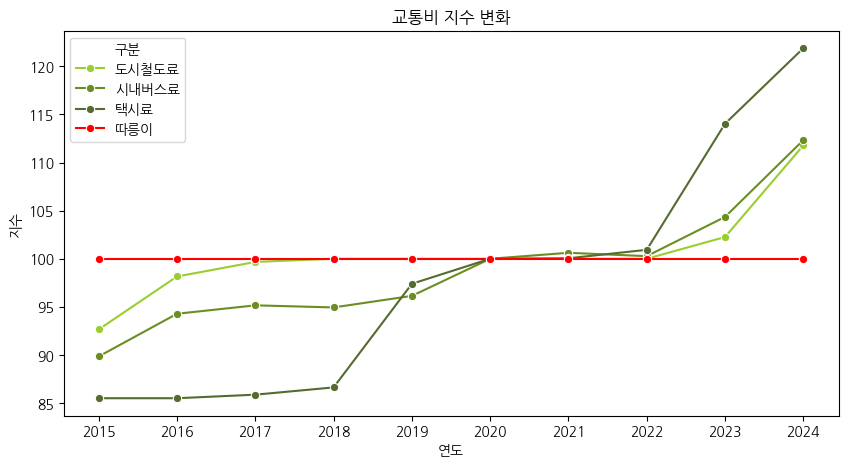

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# 데이터프레임 변환 (연도를 컬럼에서 인덱스로)
df_reset = new_df.reset_index().melt(id_vars='index', var_name='구분', value_name='지수')

# 그래프 그리기
plt.figure(figsize=(10,5))
sns.lineplot(data=df_reset, x='index', y='지수', hue='구분', marker='o', palette=['yellowgreen', 'olivedrab', 'darkolivegreen', 'red'])


# 스타일 설정
plt.xlabel('연도')
plt.ylabel('지수')
plt.title('교통비 지수 변화')
plt.legend(title='구분')

plt.show()

In [ ]:
df_reset

,index,구분,지수
0,2015,도시철도료,92.653
1,2016,도시철도료,98.156
2,2017,도시철도료,99.67
3,2018,도시철도료,100
4,2019,도시철도료,100
5,2020,도시철도료,100
6,2021,도시철도료,100.0
7,2022,도시철도료,100.0
8,2023,도시철도료,102.26
9,2024,도시철도료,111.78


### 도시별 공공자전거 대수 비교

In [ ]:
city_bike_df = pd.DataFrame({
    '따릉이': [9597372, 45000], # 2024년
    '뉴욕 씨티바이크': [8258035, 33000], # 뉴욕은 2023년 자료
    '런던 산탄데르사이클': [9748000, 12000] # 2024년
})

In [ ]:
city_bike_df

,따릉이,뉴욕 씨티바이크,런던 산탄데르사이클
0,9597372,8258035,9748000
1,45000,33000,12000


In [ ]:
city_bike_df_1 = city_bike_df.transpose()

In [ ]:
city_bike_df_1

,0,1
따릉이,9597372,45000
뉴욕 씨티바이크,8258035,33000
런던 산탄데르사이클,9748000,12000


In [ ]:
city_bike_df_1.columns = ['인구수', '자전거대수']

In [ ]:
city_bike_df_1

,인구수,자전거대수
따릉이,9597372,45000
뉴욕 씨티바이크,8258035,33000
런던 산탄데르사이클,9748000,12000


In [ ]:
city_bike_df_1['자전거대비 사람'] = city_bike_df_1['인구수']/city_bike_df_1['자전거대수']

In [ ]:
city_bike_df_1

,인구수,자전거대수,인구대비 대수,자전거대비 사람
따릉이,9597372,45000,213.274933,213.274933
뉴욕 씨티바이크,8258035,33000,250.243485,250.243485
런던 산탄데르사이클,9748000,12000,812.333333,812.333333


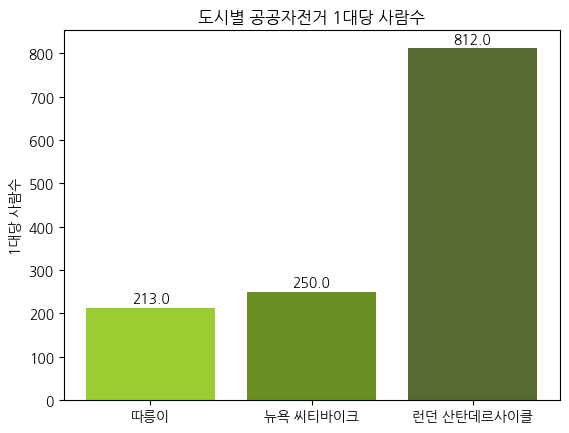

In [ ]:
plt.bar(x = city_bike_df_1.index, height = city_bike_df_1['자전거대비 사람'], color = ['yellowgreen', 'olivedrab','darkolivegreen'])

for i, value in enumerate(city_bike_df_1['자전거대비 사람'].round(0)):
    plt.text(i, value + 5, str(value), ha='center', va='bottom')  # va는 value 위치 조정

# 그래프 제목과 라벨 설정
plt.title('도시별 공공자전거 1대당 사람수')
plt.ylabel('1대당 사람수')

# 그래프 표시
plt.show()

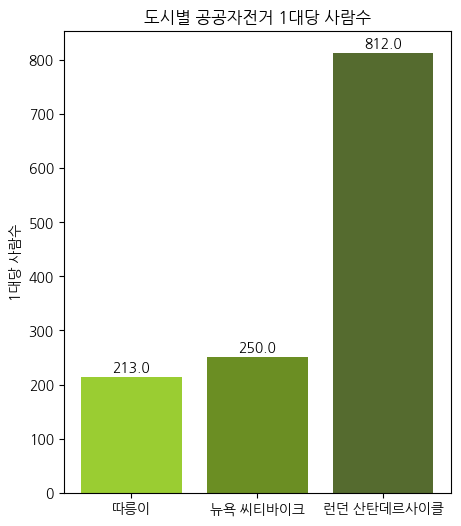

In [ ]:
plt.figure(figsize=(5,6))
plt.bar(x = city_bike_df_1.index, height = city_bike_df_1['자전거대비 사람'], color = ['yellowgreen', 'olivedrab','darkolivegreen'])

for i, value in enumerate(city_bike_df_1['자전거대비 사람'].round(0)):
    plt.text(i, value + 5, str(value), ha='center', va='bottom')  # va는 value 위치 조정

# 그래프 제목과 라벨 설정
plt.title('도시별 공공자전거 1대당 사람수')
plt.ylabel('1대당 사람수')

# 그래프 표시
plt.show()

### 따릉이 누적대수 및 운영비 비교

In [ ]:
tax_df = pd.read_excel('/content/drive/MyDrive/코드잇부트캠프/프로젝트/초급 프로젝트/data/따릉이세입세출예산.xlsx', index_col = 0)

In [ ]:
tax_df

,누적대수,이용실적,요금수입,운영비
2024년 1월,45000,NaN,1.718900e+10,3.237800e+10
2023년,45000,44905313.0,1.646700e+10,2.741600e+10
2022년,43500,40948900.0,1.625500e+10,2.566100e+10
2021년,40500,32053367.0,1.403400e+10,2.433900e+10
2020년,37500,23705176.0,1.183000e+10,2.173000e+10
2019년,29500,19074794.0,9.057000e+09,1.801300e+10
2018년,25000,10061684.0,5.262000e+09,1.197900e+10
2017년,20000,5031039.0,2.786000e+09,6.985000e+09
2016년,5600,1611631.0,8.750000e+08,3.421000e+09
NaN,NaN,NaN,NaN,NaN


In [ ]:
tax_df = tax_df.dropna(how='any') # 하나라도 NaN 제거
tax_df

,누적대수,이용실적,요금수입,운영비
2023년,45000,44905313.0,1.646700e+10,2.741600e+10
2022년,43500,40948900.0,1.625500e+10,2.566100e+10
2021년,40500,32053367.0,1.403400e+10,2.433900e+10
2020년,37500,23705176.0,1.183000e+10,2.173000e+10
2019년,29500,19074794.0,9.057000e+09,1.801300e+10
2018년,25000,10061684.0,5.262000e+09,1.197900e+10
2017년,20000,5031039.0,2.786000e+09,6.985000e+09
2016년,5600,1611631.0,8.750000e+08,3.421000e+09


In [ ]:
tax_df_1 = tax_df.iloc[::-1]  # 인덱스 순서를 뒤집기
tax_df_1

,누적대수,이용실적,요금수입,운영비
2016년,5600,1611631.0,8.750000e+08,3.421000e+09
2017년,20000,5031039.0,2.786000e+09,6.985000e+09
2018년,25000,10061684.0,5.262000e+09,1.197900e+10
2019년,29500,19074794.0,9.057000e+09,1.801300e+10
2020년,37500,23705176.0,1.183000e+10,2.173000e+10
2021년,40500,32053367.0,1.403400e+10,2.433900e+10
2022년,43500,40948900.0,1.625500e+10,2.566100e+10
2023년,45000,44905313.0,1.646700e+10,2.741600e+10


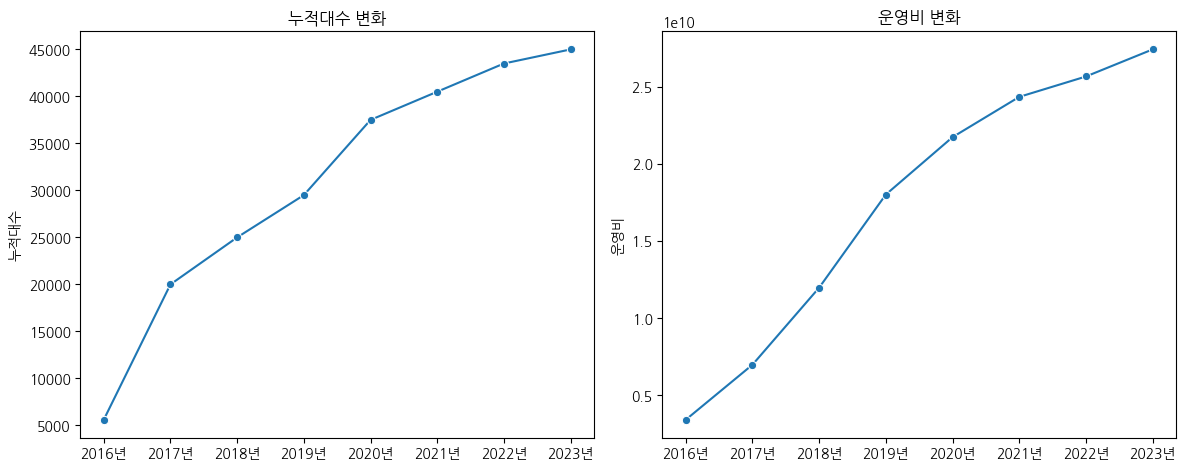

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

fig, axes = plt.subplots(1, 2, figsize=(12, 5))  # 1행 2열 서브플롯 생성


# 첫 번째 그래프: 누적대수
sns.lineplot(data=tax_df_1, x=tax_df_1.index, y='누적대수', marker='o', ax=axes[0])
axes[0].set_title('누적대수 변화')
axes[0].set_xlabel('')


# 두 번째 그래프: 운영비
sns.lineplot(data=tax_df_1, x=tax_df_1.index, y='운영비', marker='o', ax=axes[1])
axes[1].set_title('운영비 변화')
axes[0].set_xlabel('')

plt.tight_layout()  # 그래프 간격 조정
plt.xlabel('')
plt.show()

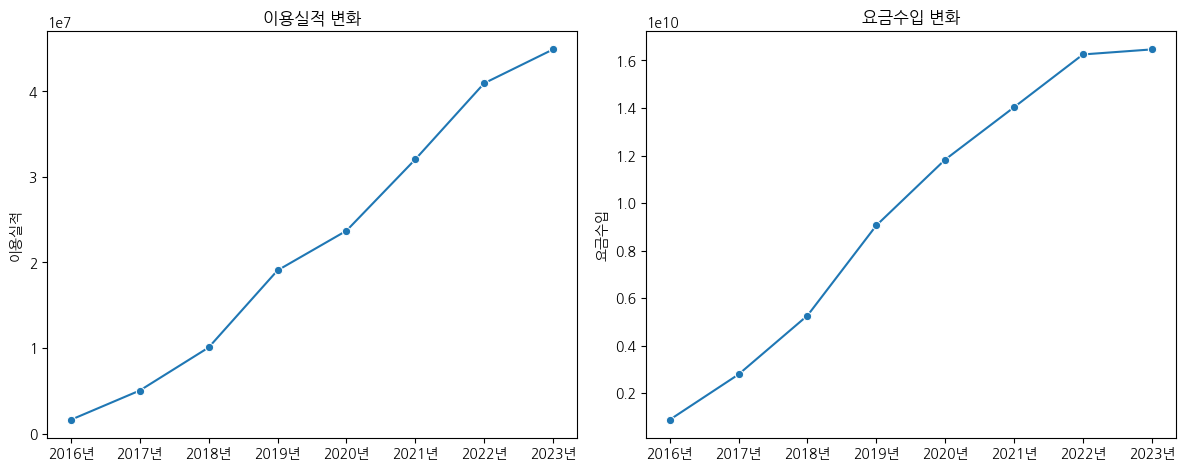

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(12, 5))  # 1행 2열 서브플롯 생성

# 첫 번째 그래프: 누적대수
sns.lineplot(data=tax_df_1, x=tax_df_1.index, y='이용실적', marker='o', ax=axes[0])
axes[0].set_title('이용실적 변화')
axes[0].set_xlabel('')

# 두 번째 그래프: 운영비
sns.lineplot(data=tax_df_1, x=tax_df_1.index, y='요금수입', marker='o', ax=axes[1])
axes[1].set_title('요금수입 변화')
axes[0].set_xlabel('')

plt.tight_layout()  # 그래프 간격 조정
plt.xlabel('')
plt.show()